In [16]:
from matchms.importing import load_from_mgf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
spectra_path = "../../data/data/MassSpecGym.mgf"

In [3]:
spectra = list(load_from_mgf(spectra_path))

In [5]:
def load_mgf_with_folds(mgf_path):

    spectra = list(load_from_mgf(mgf_path))
    records = []
    for spec in spectra:
        record = spec.to_dict()
        records.append(record)
    df = pd.DataFrame(records)

    if 'fold' not in df.columns:
        raise ValueError("fold column is missing. Ensure the dataset has been split into train/val/test.")
    
    df.collision_energy = df.collision_energy.astype(float)
    df.parent_mass = df.parent_mass.astype(float)
    df.precursor_mz = df.precursor_mz.astype(float)
    
    return df

In [6]:
df = load_mgf_with_folds(spectra_path)

In [7]:
df['adduct'].unique()

array(['[M+H]+', '[M+Na]+'], dtype=object)

In [9]:
len(df['collision_energy'].unique())

10216

In [14]:
min(df['collision_energy'].unique()), max(df['collision_energy'].unique())

(0.0, 358.40016)

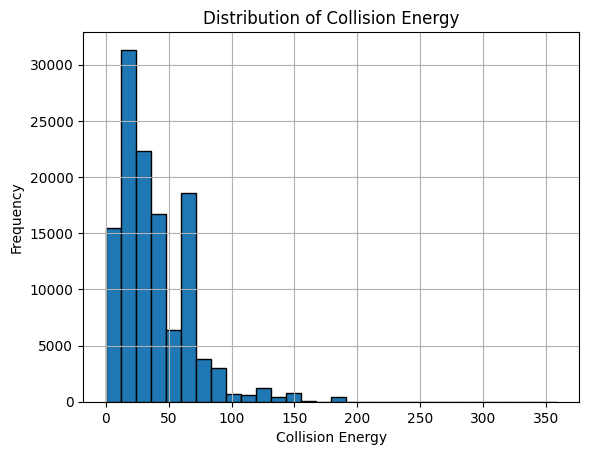

In [17]:
df['collision_energy'].hist(bins=30, edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Collision Energy')
plt.xlabel('Collision Energy')
plt.ylabel('Frequency')
plt.show()

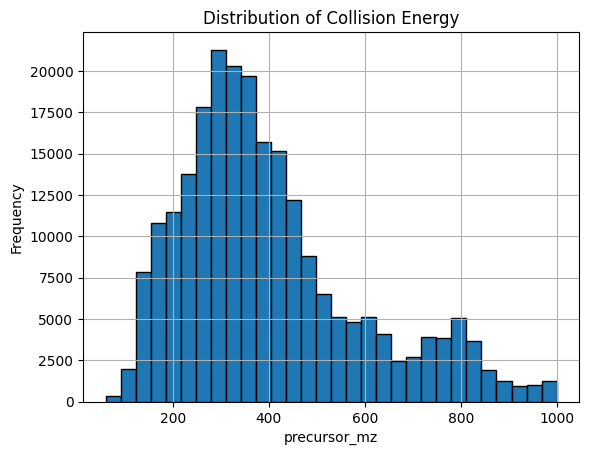

In [18]:
df['precursor_mz'].hist(bins=30, edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Collision Energy')
plt.xlabel('precursor_mz')
plt.ylabel('Frequency')
plt.show()

In [15]:
df['instrument_type'].unique()

array(['Orbitrap', 'QTOF', nan], dtype=object)